In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
fuel = pd.read_csv("fuel-econ.csv")

sedan = ['Minicompact Cars', 'Large Cars', 'Compact Cars', 'Subcompact Cars', 'Midsize Cars']
vclasses = pd.api.types.CategoricalDtype(ordered= True, categories=sedan)

fuel['VClass'] = fuel['VClass'].astype(vclasses);

fuel['tran_type'] = fuel['trans'].apply(lambda x: x.split()[0])

In [5]:
print(fuel.shape)
fuel.head(8)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,tran_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5,Automatic
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,...,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5,Automatic


In [6]:
np.random.seed(2018)
sample = np.random.choice(fuel.shape[0], 200, replace= False)
fuel_subset = fuel.loc[sample]

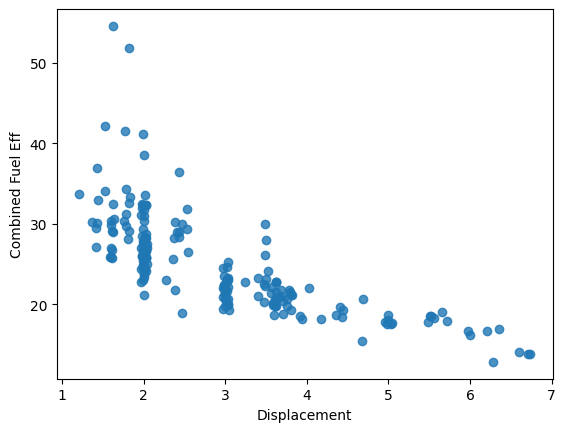

In [7]:
sb.regplot(data = fuel_subset, x = 'displ', y = 'comb', x_jitter= 0.04, fit_reg= False);
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff');

In [8]:
# Print column names of fuel_subset for verification
print(fuel_subset.columns.tolist())  # Check if "trans_type" is present

['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType', 'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway', 'UHighway', 'comb', 'co2', 'feScore', 'ghgScore', 'tran_type']


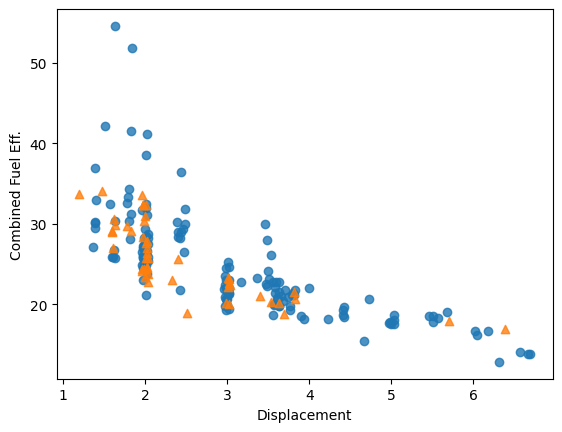

In [9]:
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]
for ttype, marker in ttype_markers:
    plot_data = fuel_subset.loc[fuel_subset['tran_type'] == ttype]
    sb.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker)
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');


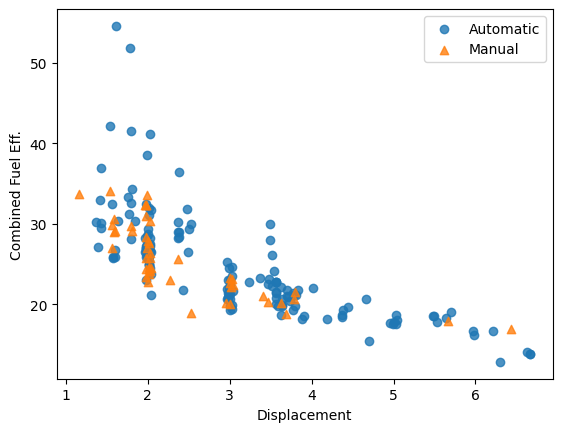

In [10]:
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]
for ttype, marker in ttype_markers:
    plot_data = fuel_subset.loc[fuel_subset['tran_type'] == ttype]
    sb.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker)
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');
plt.legend(['Automatic', 'Manual']);

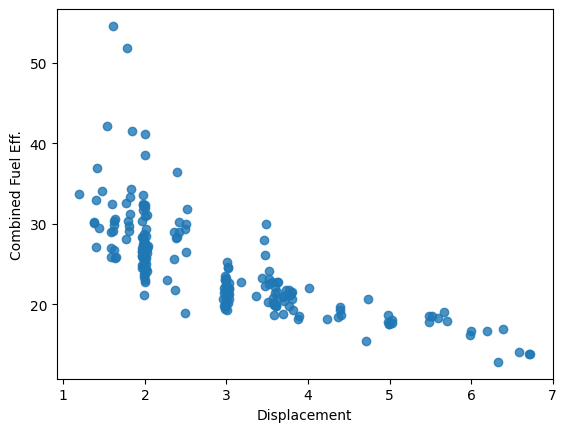

In [13]:
sb.regplot(data= fuel_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

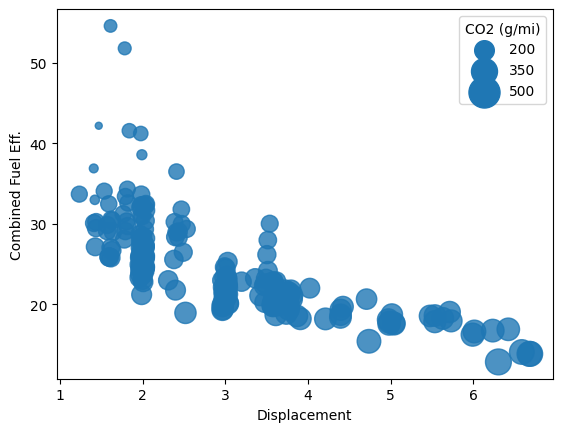

In [16]:
sb.regplot(data= fuel_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False, scatter_kws= {'s' : fuel_subset['co2'] / 2});
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
lengend_obj = []

for s in sizes:
    lengend_obj.append(plt.scatter([], [], s= s, color= base_color))

plt.legend(lengend_obj, sizes, title= 'CO2 (g/mi)');

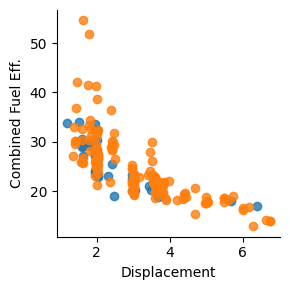

In [17]:
m = sb.FacetGrid(data= fuel_subset, hue = 'tran_type')

m.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

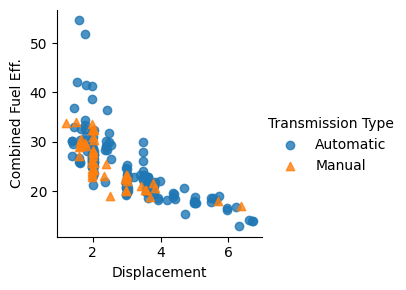

In [19]:
m = sb.FacetGrid(data= fuel_subset, hue = 'tran_type', hue_order= ['Automatic', 'Manual'], hue_kws= {'marker': ['o', '^']})

m = m.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
m.add_legend(title= 'Transmission Type')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff.');

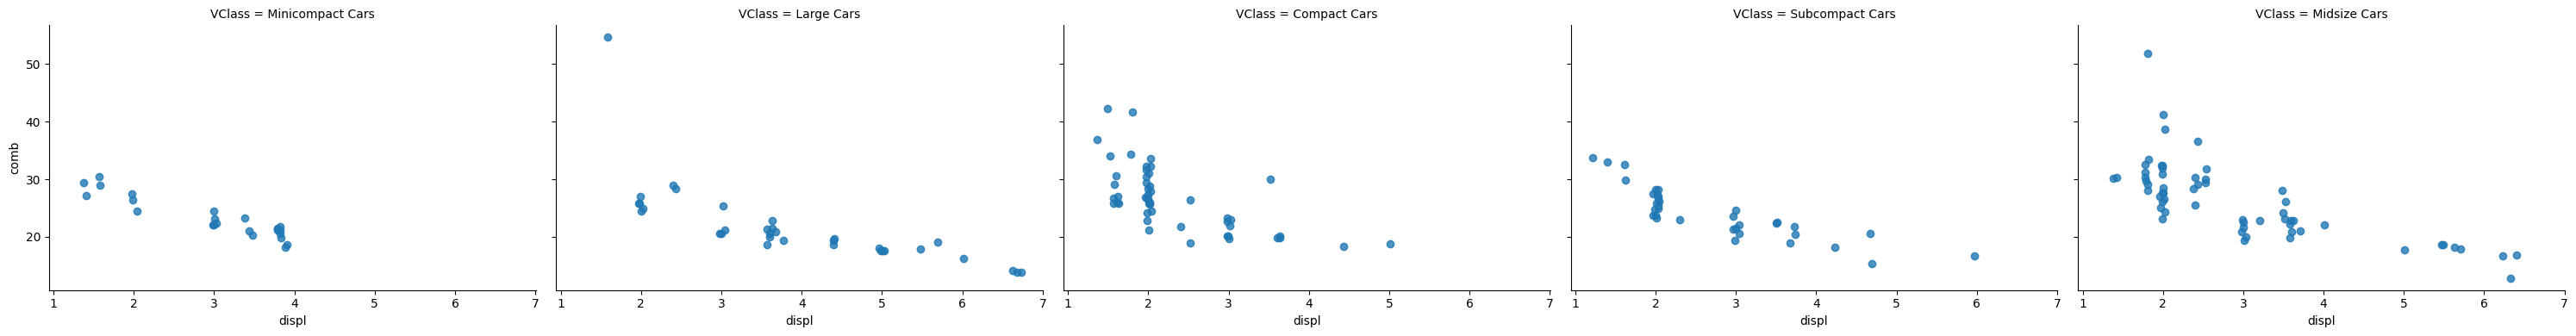

In [24]:
m = sb.FacetGrid(data=fuel_subset, col='VClass', height=4, aspect=1.5, margin_titles=True)

# Rest of your plotting code
m.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
m.set_titles('{col_name}')
plt.show()

In [25]:
 ## faceting into 2 vaariables